In [1]:
# 🎓 Student Performance Predictor
# Author: Thulana De Silva

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for better plot style
sns.set(style="whitegrid")

# Show plots inside notebook
%matplotlib inline


In [2]:
# Load the dataset
df = pd.read_csv('../data/student_data.csv')

# Show first 5 rows
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# Check for null values and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
# Summary statistics
df.describe()


,math score,reading score,writing score,average_score,pass
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667,0.897000
std,15.16308,14.600192,15.195657,14.257326,0.304111
min,0.00000,17.000000,10.000000,9.000000,0.000000
25%,57.00000,59.000000,57.750000,58.333333,1.000000
50%,66.00000,70.000000,69.000000,68.333333,1.000000
75%,77.00000,79.000000,79.000000,77.666667,1.000000
max,100.00000,100.000000,100.000000,100.000000,1.000000


In [4]:
# Check if any columns have missing values
df.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

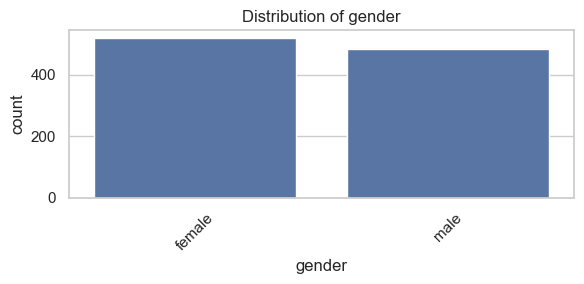

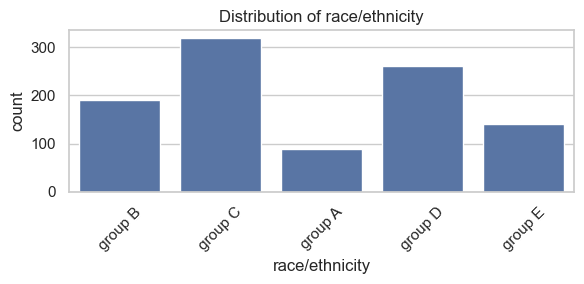

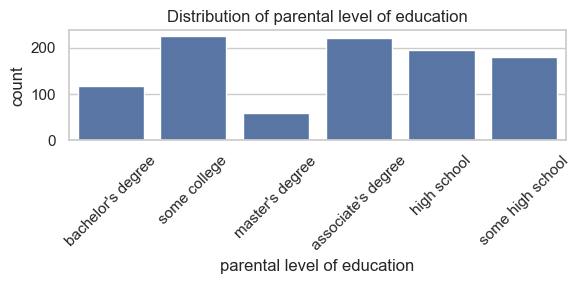

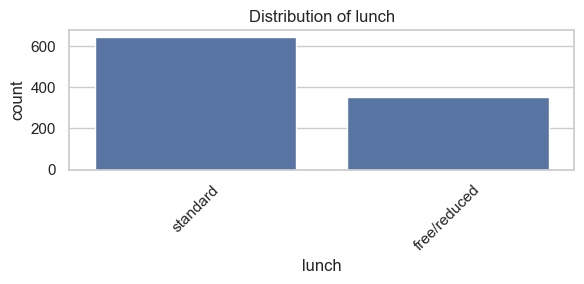

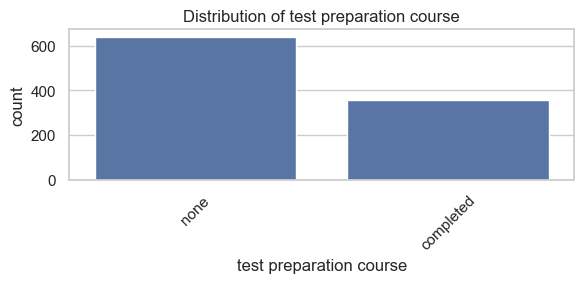

In [5]:
# Count plots for categorical columns
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for col in categorical_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()


In [6]:
# Calculate average score
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Add pass/fail label (1 = pass, 0 = fail)
df['pass'] = df['average_score'].apply(lambda x: 1 if x >= 50 else 0)

# Check
df[['average_score', 'pass']].head()


,average_score,pass
0,72.666667,1
1,82.333333,1
2,92.666667,1
3,49.333333,0
4,76.333333,1


In [7]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Check new column names
df_encoded.columns


Index(['math score', 'reading score', 'writing score', 'average_score', 'pass',
       'gender_male', 'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group D', 'race/ethnicity_group E',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_standard',
       'test preparation course_none'],
      dtype='object')

In [8]:
from sklearn.model_selection import train_test_split

# Features (drop columns not needed)
X = df_encoded.drop(['average_score', 'pass'], axis=1)

# Target
y = df_encoded['pass']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shape
X_train.shape, X_test.shape


((800, 15), (200, 15))

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [11]:
# Predict on test data
y_pred = model.predict(X_test)


Accuracy: 0.995

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.99      1.00      1.00       173

    accuracy                           0.99       200
   macro avg       1.00      0.98      0.99       200
weighted avg       1.00      0.99      0.99       200



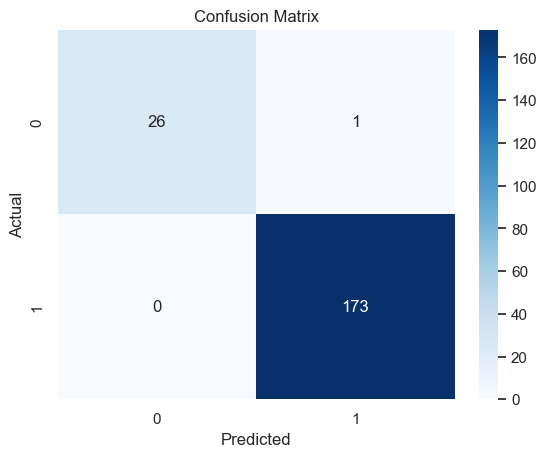

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [13]:
import joblib

# Save trained model
joblib.dump(model, '../student_pass_predictor_model.pkl')


['../student_pass_predictor_model.pkl']